### Loading Data & Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from thefuzz import process,fuzz

### Remove Warning

In [3]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning, module ='openpyxl')

In [4]:
# read dataset
candyData = pd.read_excel("candyhierarchy2017.xlsx")

### Show Sample Of Data

In [5]:
candyData.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [6]:
candyData.tail()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2459,90314802,No,Female,66,usa,Pennsylvania,DESPAIR,DESPAIR,JOY,DESPAIR,...,NaN,"You hit all my chocolate highlights, and broug...",White and gold,NaN,Sunday,1.0,NaN,NaN,NaN,"(19, 26)"


### Show More Info

In [7]:
candyData.shape

(2460, 120)

In [8]:
candyData.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [9]:
candyData.duplicated().any()

False

In [10]:
candyData.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


### Above cells' conclusion

- Dataset has missing values
- Dataset has no complete duplicates
- We need to remove some columns not use
- We need to modify some column datatype
- We need to rename some column name to avoid confusion
- describe method no given information 

## Cleaning

In [11]:
# show columns that hase more 50 % nan value

for i in range(len(candyData.isnull().sum())):
    if candyData.isna().sum()[i] >1229 :
        print(f"Column {candyData.isna().sum().index[i]} contains {candyData.isna().sum()[i]} nan value\n")

Column Q7: JOY OTHER contains 1549 nan value

Column Q8: DESPAIR OTHER contains 1743 nan value

Column Q9: OTHER COMMENTS contains 2074 nan value

Column Unnamed: 113 contains 2451 nan value

Column Q12: MEDIA [Daily Dish] contains 2375 nan value

Column Q12: MEDIA [ESPN] contains 2361 nan value

Column Q12: MEDIA [Yahoo] contains 2393 nan value



In [12]:
# drop columns we not used

candyData.drop(columns = ["Internal ID", "Unnamed: 113", "Click Coordinates (x, y)", "Q5: STATE, PROVINCE, COUNTY, ETC"], inplace = True)

In [13]:
# drop columns that contain more than 50 % nan value except Q12

candyData.drop(columns=["Q7: JOY OTHER", "Q8: DESPAIR OTHER", "Q9: OTHER COMMENTS"],inplace= True)

In [14]:
# handle candyData columns name

# 1- create dictionary key is old name and value is new name
newNames = {"Q1: GOING OUT?" :"going out", "Q2: GENDER": "gender", "Q3: AGE": "age", "Q4: COUNTRY": "country",
            "Q10: DRESS" : "dress", "Q12: MEDIA [Science]":"Science","Q11: DAY": "day", "Q12: MEDIA [Daily Dish]":"Daily Dish",
            "Q12: MEDIA [ESPN]":"ESPN", "Q12: MEDIA [Yahoo]":"Yahoo"}

# 2- rename columns
candyData.rename(columns = newNames, inplace= True)

In [15]:
# show sample of dataframe

candyData.sample(5)

,going out,gender,age,country,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),...,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,dress,day,Daily Dish,Science,ESPN,Yahoo
2458,No,Male,58,Usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,No,Male,76,usa,MEH,NaN,JOY,MEH,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,Blue and black,Friday,NaN,1.0,NaN,NaN
1282,No,Male,58,US,MEH,DESPAIR,JOY,DESPAIR,NaN,NaN,...,NaN,NaN,DESPAIR,JOY,Blue and black,Friday,NaN,NaN,NaN,1.0
1101,No,Male,55,USA,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
2019,No,Male,42,USA,JOY,JOY,JOY,MEH,MEH,MEH,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,NaN,NaN,NaN


# Univariate Analysis

### Discovering `going out` column

In [16]:
# show unique values

candyData["going out"].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [17]:
# output value counts of each unique values

candyData["going out"].value_counts()

No     2038
Yes     312
Name: going out, dtype: int64

In [18]:
# show how many nan value 

candyData["going out"].isna().sum() 

110

In [19]:
# fill nan value with maybe (yse,no)
candyData["going out"].fillna("MayBe",inplace= True)

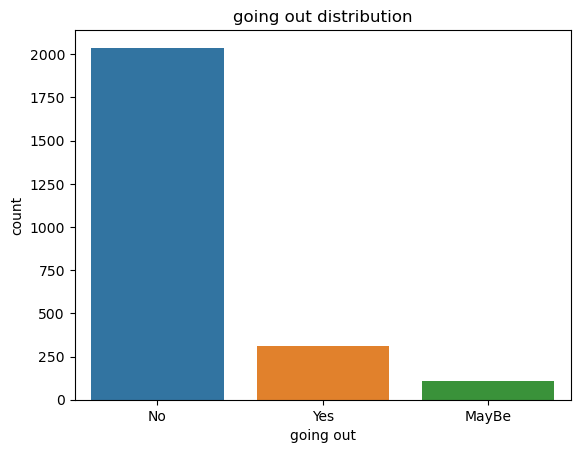

In [20]:
sns.countplot(x = "going out", data = candyData, order = candyData["going out"].value_counts().index)
plt.title("going out distribution")
plt.show()

- #### Most people are not going out

### Discovering `Gender` column

In [21]:
# show unique values

candyData["gender"].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [22]:
# output value counts of each unique values

candyData["gender"].value_counts()

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: gender, dtype: int64

In [23]:
# show how many nan value 

candyData["gender"].isna().sum() 

41

In [24]:
# fill nan value 

candyData["gender"].fillna("I'd rather not say",inplace= True)

In [25]:
# replace Other with I'd rather not say

candyData["gender"].replace("Other", "I'd rather not say", inplace= True)

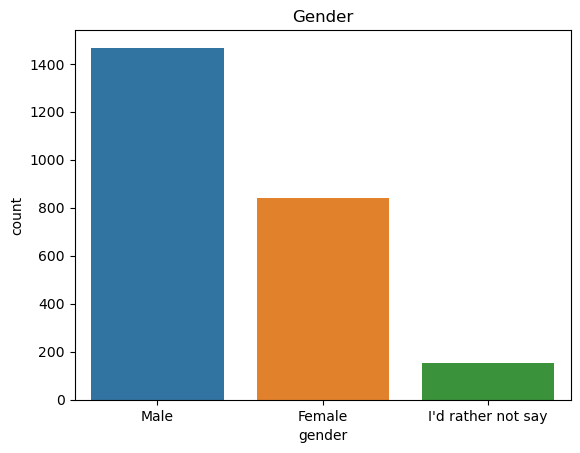

In [26]:
sns.countplot(x = "gender", data = candyData, order = candyData["gender"].value_counts().index)
plt.title("Gender")
plt.show()

- #### Male is the most common gender

### Discovering `age` column

In [27]:
# show unique values

candyData["age"].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [28]:
# replace non nomeric to nan value

candyData['age'] = pd.to_numeric(candyData["age"], errors = "coerce")

In [29]:
# show how many nan value 

candyData["age"].isna().sum()

108

In [30]:
# show summary statistic

candyData[["age"]].describe()

,age
count,2352.000000
mean,42.617304
std,23.846531
min,1.000000
25%,34.000000
50%,41.000000
75%,50.000000
max,1000.000000


### `age` column has outliers we need to fixed

In [32]:
# fixed outlier

Q1, Q3 = candyData["age"].quantile(0.25), candyData["age"].quantile(0.75)

IQR = Q3 - Q1

Upper = Q3 + (1.5 * IQR)
Lower = Q1 - (1.5 * IQR)

# replace out of range with nan value
candyData.loc[(candyData["age"] > Upper) | (candyData["age"] < Lower), "age"] = np.nan

In [33]:
# fill nan value with mean

average = candyData["age"].mean()
candyData["age"].fillna(average, inplace = True)

In [34]:
# show summary statistic

candyData[["age"]].describe()

,age
count,2460.000000
mean,42.029204
std,11.140769
min,10.000000
25%,35.000000
50%,42.000000
75%,49.000000
max,74.000000


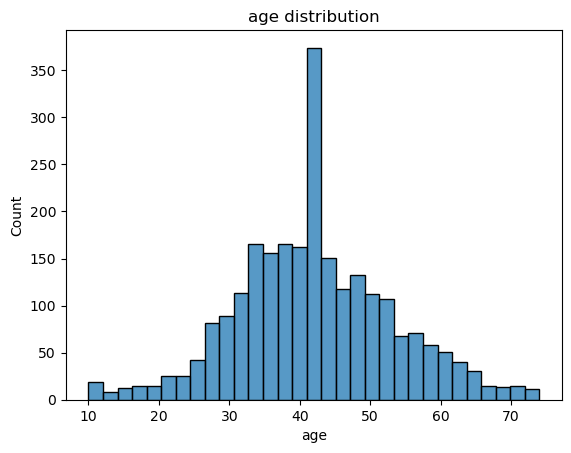

In [35]:
sns.histplot(x = "age", data = candyData)
plt.title("age distribution")
plt.show()

- #### Most people who did the survey were between 35 and 50

### Discovering `country` column

In [36]:
# show unique values

candyData["country"].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [37]:
# fixed some errors

# 1- convert all value to lower case
candyData["country"] = candyData["country"].str.lower()

# 2- remove extra spaces 
candyData["country"] = candyData["country"].str.strip()

In [38]:
# show how many nan value 

candyData["country"].isna().sum() 

69

In [39]:
# fill nan value

candyData["country"].fillna("Other country", inplace = True)

In [40]:
# show again unique value

candyData["country"].unique()

array(['Other country', 'usa', 'us', 'canada', 'murica', 'united states',
       'uk', 'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', '

In [41]:
# fixed some errors

# 1- create list of countries 
correct_countries = ["usa", "united states", "canada", "america", "united kingdom"]

# 2- Replace name of country with the corresponding name
for test_country in correct_countries:
    matches = process.extract(test_country, candyData['country'], limit = candyData.shape[0])
    
    for matching in matches:
        if matching[1] >= 80:
            candyData.loc[candyData['country'] == matching[0], 'country'] = test_country
            
# 3- remove dot from words
candyData["country"] = candyData["country"].str.replace(".","")

# 4- replace some words with other
candyData["country"] = candyData["country"].replace(["united states", "america", "new jersey", "u s a","us of a",
                                                     "north carolina", "new york", "usa? hard to tell anymore","usa",
                                                     "mexico", "california"],"USA")

candyData["country"] = candyData["country"].replace(["uk", "united kingdom", "endland", "france"], "UK")


candyData["country"] = candyData["country"].replace(["netherlands", "germany","iceland", "scotland", "ireland", "greece",
                                                    "finland", "europe", "switzerland", "sweden", "denmark", "spain",
                                                     "the netherlands"], "Other european countries")

candyData['country'] = candyData['country'].replace(["japan", "uae", "hong kong", "china", "indonesia", "south korea",
                                                     "singapore", "korea", "taiwan"],"Asian countries")


candyData["country"] = candyData["country"].replace(["fear and loathing", "england", "murica", "earth", "costa rica", 
                                                     "insanity lately", "trumpistan","canae", "ud", "pittsburgh","murrika",
                                                     "atlantis","soviet canuckistan", "alaska","subscribe to dm4uz3 on youtube",
                                                     "narnia", "south africa","i don't know anymore", "cascadia"],
                                                     "Other country")



C:\Users\Ahmed_abbas\AppData\Local\Temp\ipykernel_15716\2660519598.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  candyData["country"] = candyData["country"].str.replace(".","")


In [42]:
# show again unique value

candyData["country"].unique()

array(['Other country', 'USA', 'canada', 'UK', 'Asian countries',
       'Other european countries', 'australia'], dtype=object)

In [43]:
# output value counts of each unique values

candyData["country"].value_counts()

USA                         2049
canada                       226
Other country                 88
Other european countries      38
UK                            37
Asian countries               15
australia                      7
Name: country, dtype: int64

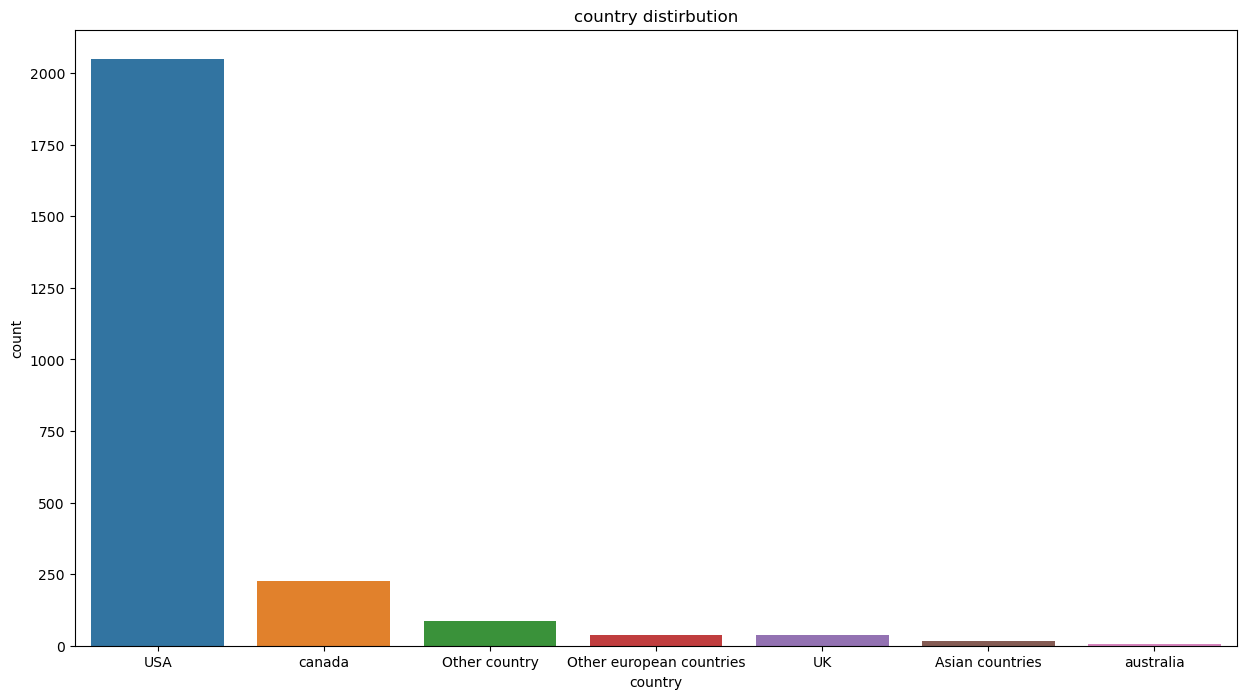

In [44]:
plt.figure(figsize = (15,8))
sns.countplot(x = "country", data = candyData, order = candyData["country"].value_counts().index )
plt.title("country distirbution")
plt.show()

- #### Most countries from USA and Canada

### Discovering `dress` column

In [45]:
# show unique values

candyData["dress"].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [46]:
# output value counts of each unique values

candyData["dress"].value_counts()

White and gold    1081
Blue and black     635
Name: dress, dtype: int64

In [47]:
# show how many nan value 

candyData["dress"].isna().sum() 

744

In [48]:
# fill nan value

candyData["dress"].fillna("Other colors", inplace = True)

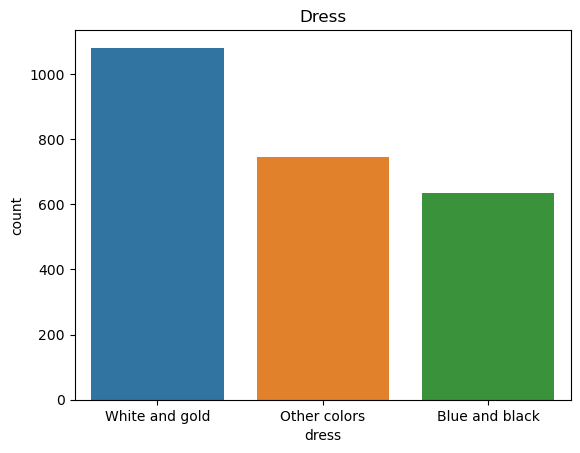

In [49]:
sns.countplot(x = "dress", data = candyData, order = candyData["dress"].value_counts().index )
plt.title("Dress")
plt.show()

- #### Most people like dress white and gold

### Discovering `day` column

In [50]:
# show unique values

candyData["day"].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [51]:
# show how many nan value 

candyData["day"].isna().sum()

725

In [52]:
# fill nan value 

candyData["day"].fillna("Other Day", inplace = True)  

In [53]:
# # output value counts of each unique values

candyData["day"].value_counts()

Friday       1091
Other Day     725
Sunday        644
Name: day, dtype: int64

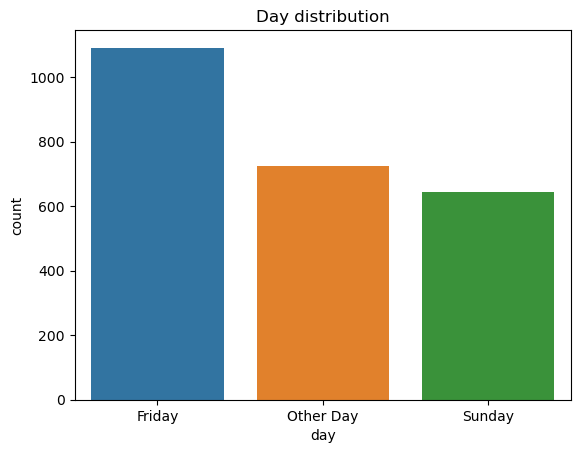

In [54]:
sns.countplot(x = "day", data = candyData, order = candyData["day"].value_counts().index)
plt.title("Day distribution")
plt.show()

- #### Most people preferred friday

### Discovering `Science` column

In [55]:
# show unique values

candyData["Science"].unique()

array([nan,  1.])

In [56]:
# show how many nan value 

candyData["Science"].isna().sum()

1098

In [59]:
# fill nan value 

candyData["Science"].fillna("unknown", inplace = True)

In [60]:
# # output value counts of each unique values

candyData["Science"].value_counts()

1.0        1362
unknown    1098
Name: Science, dtype: int64

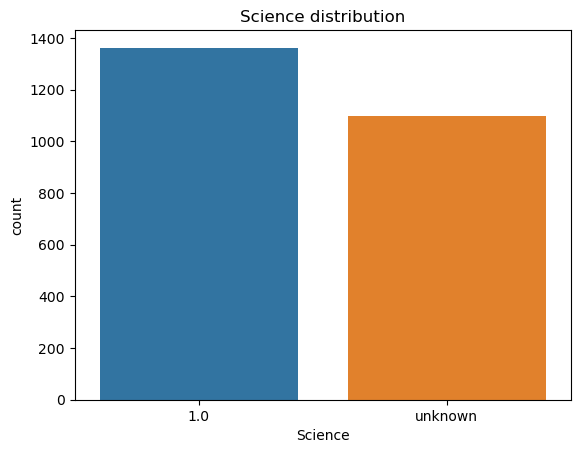

In [61]:
sns.countplot(x = "Science", data = candyData, order = candyData["Science"].value_counts().index)
plt.title("Science distribution")
plt.show()

### Discovering `ESPN` column

In [95]:
# show unique values

candyData["ESPN"].unique()

array(['unknown', 1.0], dtype=object)

In [62]:
# show how many nan value 

candyData["ESPN"].isna().sum()

2361

In [63]:
# fill nan value 

candyData["ESPN"].fillna("unknown", inplace = True)

In [64]:
# # output value counts of each unique values

candyData["ESPN"].value_counts()

unknown    2361
1.0          99
Name: ESPN, dtype: int64

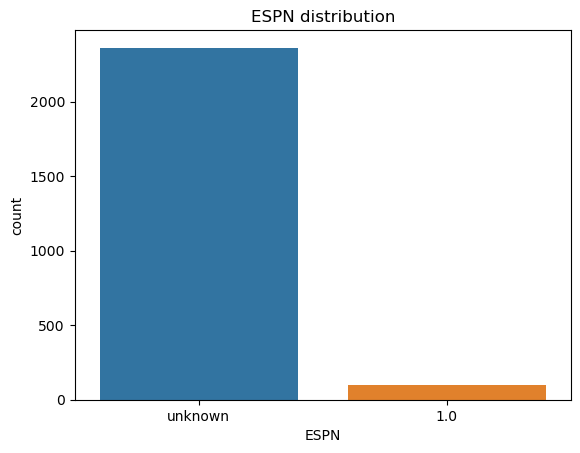

In [65]:
sns.countplot(x = "ESPN", data = candyData, order = candyData["ESPN"].value_counts().index)
plt.title("ESPN distribution")
plt.show()

### Discovering `Daily Dish` column

In [66]:
# show unique values

candyData["Daily Dish"].unique()

array([nan,  1.])

In [67]:
# show how many nan value 

candyData["Daily Dish"].isna().sum()

2375

In [68]:
# fill nan value 

candyData["Daily Dish"].fillna("unknown", inplace = True)

In [69]:
# # output value counts of each unique values

candyData["Daily Dish"].value_counts()

unknown    2375
1.0          85
Name: Daily Dish, dtype: int64

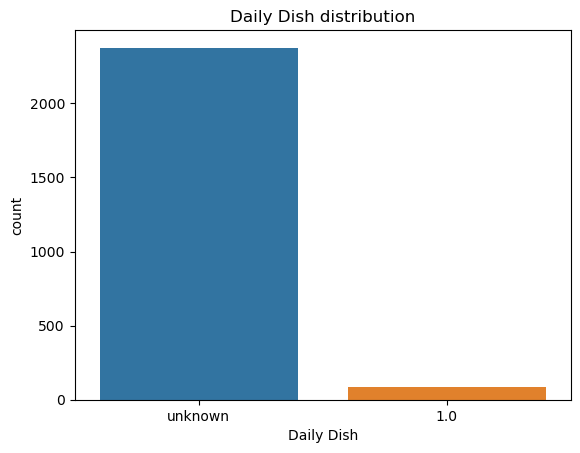

In [70]:
sns.countplot(x = "Daily Dish", data = candyData, order = candyData["Daily Dish"].value_counts().index)
plt.title("Daily Dish distribution")
plt.show()

### Discovering `Yahoo` column

In [71]:
# show unique values

candyData["Yahoo"].unique()

array([nan,  1.])

In [72]:
# show how many nan value 

candyData["Yahoo"].isna().sum()

2393

In [73]:
# fill nan value 

candyData["Yahoo"].fillna("unknown", inplace = True)

In [74]:
# # output value counts of each unique values

candyData["Yahoo"].value_counts()

unknown    2393
1.0          67
Name: Yahoo, dtype: int64

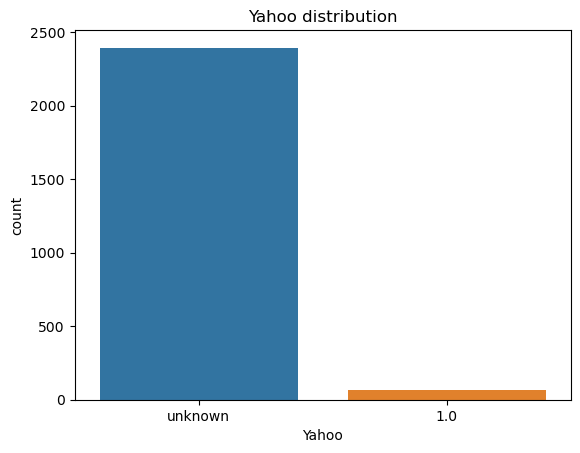

In [75]:
sns.countplot(x = "Yahoo", data = candyData, order = candyData["Yahoo"].value_counts().index)
plt.title("Yahoo distribution")
plt.show()

In [76]:
# Show most website checked out

# 1- craate list of media category
media_category = ["Science", "ESPN", "Daily Dish", "Yahoo"]

# 2- create dictionary key is media category and value is number of ones
media_used = {}

# 3- loop of list madie to get number of ones
for category in media_category:
    media_used[category] = len(candyData[candyData[category] == 1.0])
    
# 4- calculation number of No answer 
media_used["No answer"] = candyData.shape[0] - sum(media_used.values())

# 5- sorte media_used by values
media_used = dict(sorted(media_used.items(), key = lambda item : item[1] ,reverse = True))

# 6- get all keys in media_used
keys = list(media_used.keys())

# 7- get all values in media_used
values = list(media_used.values())

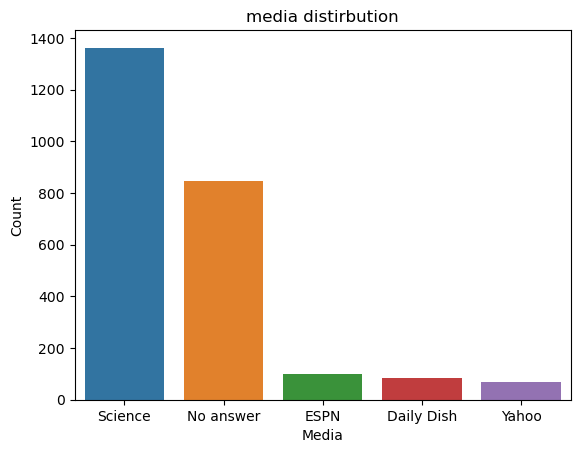

In [77]:
sns.barplot(x = keys, y = values)
plt.title("media distirbution")
plt.xlabel("Media"); plt.ylabel("Count")
plt.show()

- #### Science is the most  website checked out

# Create new DataFrame `candy`

In [78]:
# 1- create list of Question columns 
Question = [candy for candy in candyData.columns if 'Q6' in str(candy)]

# 2- create dataframe call candy
candy = pd.DataFrame(candyData[Question])

In [79]:
# show sample of dataframe

candy.sample(5)

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
2411,MEH,DESPAIR,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,JOY,...,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH
2195,MEH,DESPAIR,JOY,MEH,MEH,MEH,MEH,MEH,MEH,JOY,...,JOY,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2204,NaN,MEH,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,MEH,...,JOY,JOY,MEH,JOY,MEH,MEH,MEH,MEH,DESPAIR,JOY
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY


In [80]:
candy.shape

(2460, 103)

In [81]:
# show how many nan value in each column

candy.isna().sum()

Q6 | 100 Grand Bar                                                                        747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    734
Q6 | Any full-sized candy bar                                                             672
Q6 | Black Jacks                                                                          958
Q6 | Bonkers (the candy)                                                                  992
                                                                                         ... 
Q6 | Vicodin                                                                              789
Q6 | Whatchamacallit Bars                                                                 823
Q6 | White Bread                                                                          757
Q6 | Whole Wheat anything                                                                 747
Q6 | York Peppermint Patties                                

### Above cells' conclusion

- We need to fill nan value with other numeric value
- We need to replace all values to numeric value
- We need to rename column name to avoid confusion

## Cleaning

In [82]:
# fill nan value 

candy.fillna("unknown", inplace = True)

In [83]:
# handle candy columns name

# 1- create  dictionary key is old name and value is new name of each column
names = {}

# 2- loop over columns to fixed name and store old and new name in names
for col in candy.columns:
    names[col] = col.strip("Q6 | ")
    
# 3- rename columns
candy.rename(columns = names, inplace= True)

In [84]:
# show all column has same value or not

candy.nunique()

100 Grand Bar                                                                        4
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    4
Any full-sized candy bar                                                             4
Black Jacks                                                                          4
Bonkers (the candy)                                                                  4
                                                                                    ..
Vicodin                                                                              4
Whatchamacallit Bars                                                                 4
White Bread                                                                          4
Whole Wheat anything                                                                 4
York Peppermint Patties                                                              4
Length: 103, dtype: int64

In [85]:
# show unique value in each column

candy["100 Grand Bar"].unique()

array(['unknown', 'MEH', 'JOY', 'DESPAIR'], dtype=object)

## We have 4 value in each column

- convert DESPAIR to `-1`
- convert Joy to `1`
- convert MEH to `0`
- convert unknown to `0`

In [86]:
# replace all value with numeric value

candy.replace({"DESPAIR" : -1, "JOY" : 1, "MEH" : 0, "unknown" : 0}, inplace = True)

In [87]:
candy.sample(5)

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,1,-1,1,0,0,0,-1,-1,-1,1,...,0,0,-1,1,-1,-1,0,-1,-1,0
967,1,0,1,0,0,0,0,0,-1,1,...,1,1,0,1,-1,-1,1,-1,-1,0
248,1,0,1,-1,0,-1,1,-1,-1,1,...,0,0,-1,0,-1,1,1,-1,-1,1
1208,0,-1,1,0,0,0,-1,0,-1,1,...,1,1,0,1,-1,1,0,0,-1,1


In [88]:
# handle candy columns

def visualizing(reversed):
    # 1- create create dictionary key is Question and value is number of ones
    candy_score = {}

    # 2- loop over columns to get number of ones of each column
    for column in candy.columns:
        candy_score[column] = len(candy[candy[column] == 1])

    # 3- sorte candy_score by values
    candy_score = dict(sorted(candy_score.items(), key = lambda item : item[1] ,reverse = reversed))

    # 4- get all keys in candy_score
    keys = list(candy_score.keys())

    # 5- get all values in candy_score
    values = list(candy_score.values())
    
    # 6- visualizing column
    sns.barplot(x = values[:10], y = keys[:10])
    plt.title("Candy distirbution")
    plt.xlabel("Count"); plt.ylabel("Candy")
    plt.show()

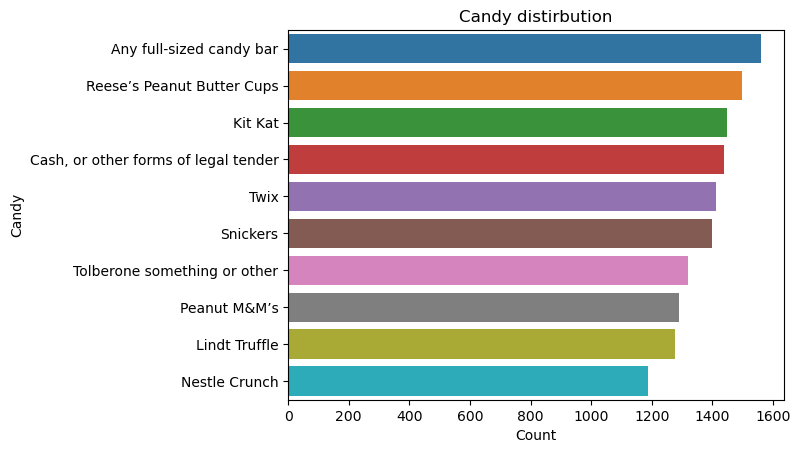

In [89]:
# show best candy
visualizing(True)

- #### Any full-sized candy bar is the most loved candy 

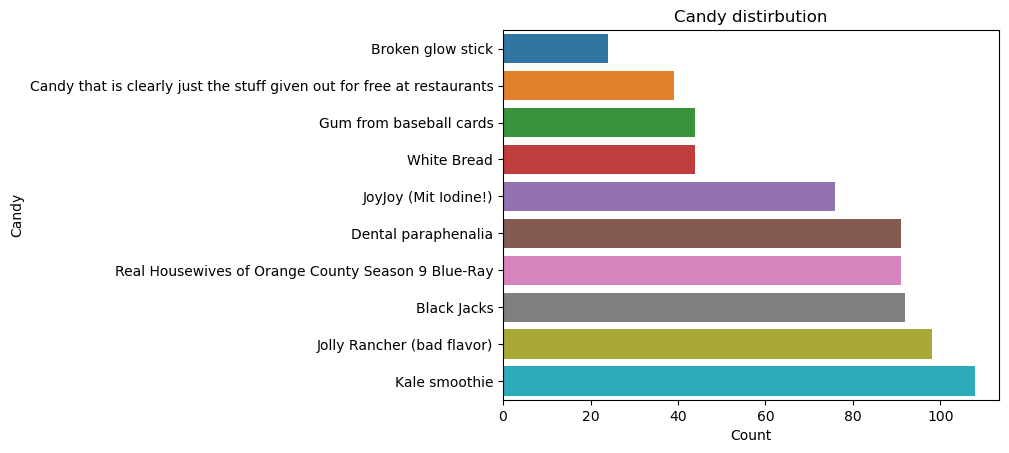

In [90]:
# show hated candy
visualizing(False)

- #### Broken glow stick is the most hated candy

# Bivariate Questions

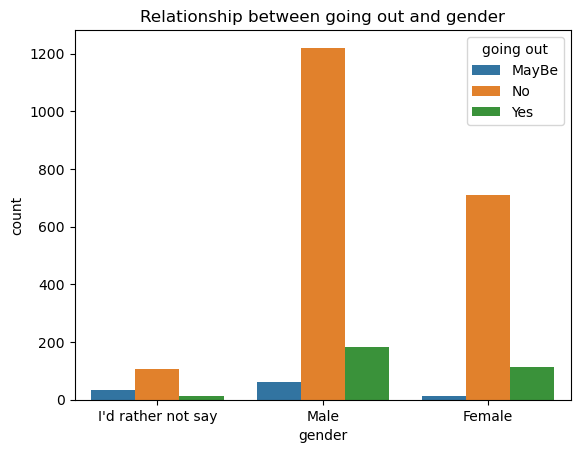

In [91]:
sns.countplot(x = "gender", hue = "going out", data = candyData)
plt.title("Relationship between going out and gender")
plt.show()

- #### Most people are going out is `male`

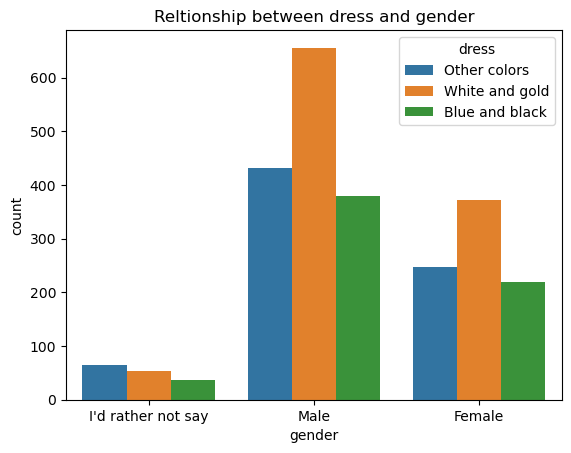

In [92]:
sns.countplot(x = "gender", hue = "dress", data = candyData)
plt.title("Reltionship between dress and gender")
plt.show()

- #### male and female saw the dress white and gold

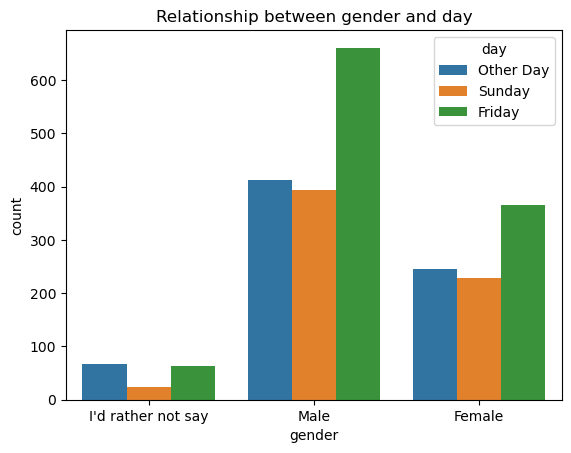

In [93]:
sns.countplot(x = "gender", hue = "day", data = candyData)
plt.title("Relationship between gender and day")
plt.show()

- #### Both male and female preferred day is friday

#  Conclusion

- ### Univariate Analysis
1. Most people aren't going out
2. Male is the most common gender
3. Most people who did the survey were between 35 and 50
4. Most countries from USA and Canada
5. Most people like dress white and gold
6. Most people preferred friday
7. Science is the most website checked out
8. Full-sized candy bar is the most loved candy
9. Broken glow stick is the most hated candy

- ### Bivariate Analysis
1. Most people are going out is male
2. Male and female saw the dress white and gold
3. Both male and female preferred day is friday

# `In the end,In future I will do more analysis`